**Fachprojekt Dokumentenanalyse** *SS 24* -- *Arthur Matei, Gernot A. Fink* -- *TU Dortmund, LS12, Arbeitsgruppe Mustererkennung*
___

# Aufgabe 4: Hauptkomponentenanalyse

Mit dem Naechster Nachbar Klassifikator wurde ein Dokumente zu einer Klassen zugeordnet, indem zunaechst aehnliche Dokumente aus einer Trainingsdatenbank ermittelt wurden. Ueber die Klassenzugehoerigkeit dieser aehnlichen Dokumente aus dem Training wurde dann das unbekannte Dokument einer Klasse zugeordnet. Dabei wurden aber noch keine Zusammenhaenge zwischen einzelnen Woertern analysiert und beruecksichtigt. Daher geht es nun um Topic Modelle. Topic Modelle beschreiben diese Zusammenhaenge durch einen mathematischen Unterraum. Die Vektoren, die diesen Unterraum aufspannen, sind die Topics, die jeweils fuer typische Wortkonfigurationen stehen. Dokumente werden nun nicht mehr durch Frequenzen von Woertern repraesentiert, sondern als Linearkombination von Topics im Topic Vektorraum. Es ist zu beachten, dass fuer die Topic-Modellierung keine Informationen ueber die Dokumentenkategorien benoetigt wird.

Um ein besseres Verstaendnis fuer diese mathematischen Unterraeume zu entwickeln, schauen wir uns zunaechst die Hauptkomponentenanalyse an.

Ein 3D Beispieldatensatz wird aus einer Normalverteilung generiert. Diese ist durch einen Mittelwert und eine Kovarianzmatrix definiert

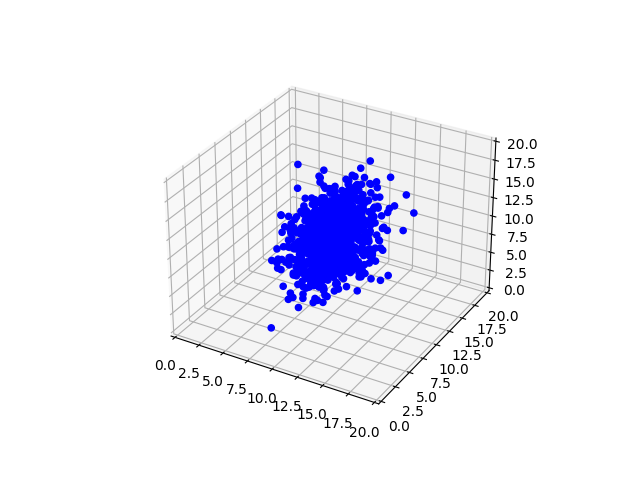

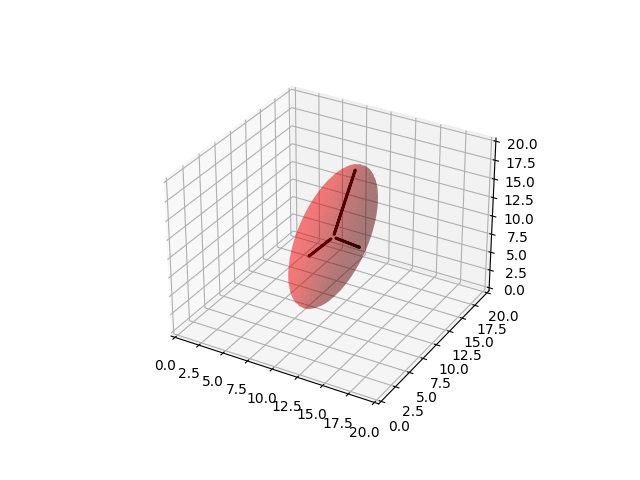

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import sys

if ".." not in sys.path:
    sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt
from common.pca import PCAExample

mean = np.array([10, 10, 10])
cov = np.array([[3, .2, .9],
                [.2, 5, .4],
                [.9, .4, 9]])
n_samples = 1000
limits_samples = ((0, 20), (0, 20), (0, 20))
samples = np.random.multivariate_normal(mean, cov, n_samples)

# Plotten der Beispieldaten
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
PCAExample.plot_sample_data(samples, ax=ax)
PCAExample.set_axis_limits(ax, limits=limits_samples)

# In der Klasse PCAExample wird ein Unterraum mittels Hauptkomponentenanalyse
# statistisch geschaetzt. Der Vektorraum wird beispielhaft visualisiert.
pca_example = PCAExample(samples, target_dim=3)
pca_example.plot_subspace(limits=limits_samples, color='r', linewidth=0.05, alpha=0.3)

Nun wird die Dimension des Unterraums reduziert. Implementieren Sie die Reduktion im Konstruktor von PCAExample. Der neue Vektorraum wird wieder visualisiert.

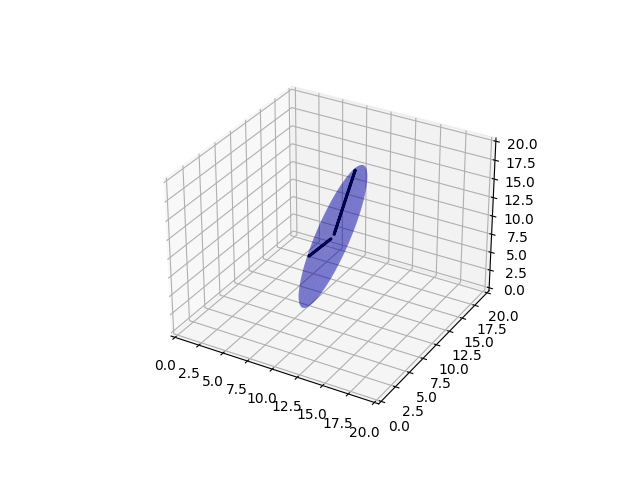

In [4]:
pca_example_2d = PCAExample(samples, target_dim=2)
pca_example_2d.plot_subspace(limits=limits_samples, color='b', linewidth=0.01, alpha=0.3)

Transformieren Sie nun die 3D Beispieldaten in den 2D Unterraum. Implementieren Sie dazu die Methode transform_samples. Die Daten werden dann in einem 2D Plot dargestellt.

Optional: Verwenden Sie Unterraeume mit Dimensionen 3, 2 und 1. Transformieren und plotten Sie die Daten.

Optional: Generieren und transformieren Sie weitere 3D Beispieldaten. Benutzen Sie dabei auch andere Parameter fuer die Normalverteilung.

Optional: Visualisieren Sie die transformierten 2D Daten auch in dem vorherigen 3D Plot.

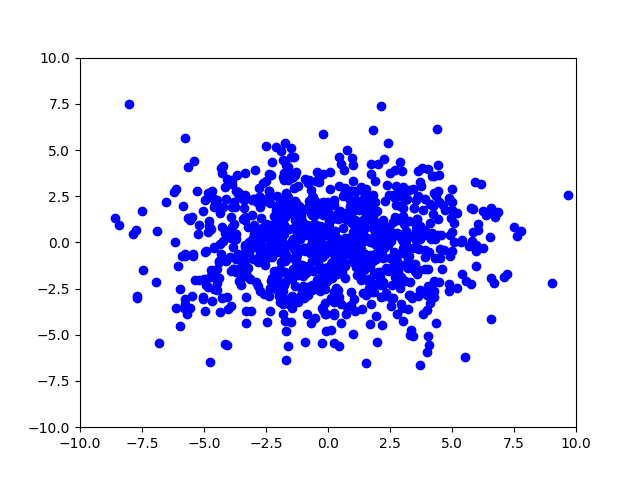

In [5]:
samples_2d = pca_example_2d.transform_samples(samples)
fig = plt.figure()
ax = fig.add_subplot(111)
PCAExample.plot_sample_data(samples_2d, ax=ax)
PCAExample.set_axis_limits(ax, limits=((-10, 10), (-10, 10)))

Berechnen Sie nun die Kovarianzmatrix der transformierten Daten. Welche Eigenschaften hat diese Matrix? (Dimension, etc.) In welcher Groessenordnung liegen die einzelnen Eintraege? Erklaeren Sie das anhand des vorherigen 2D Plots. Vergleichen Sie das Ergebnis mit der Kovarianzmatrix, die oben zur Generierung der Daten verwendet wurde. Was erwarten Sie fuer den Mittelwert der transformierten Daten (noetig fuer die Berechnung der Kovarianzmatrix)?

Verwenden Sie bei der Berechnung nicht die eingebaute numpy.cov Funktion (hoechstens zur Kontrolle, achten Sie dabei auf den "bias" Parameter) Verwenden Sie bei der Berechnung keine Schleifen, sondern nur Matrixoperationen. Erklaeren Sie die Vorgehensweise.

In [6]:
transformed_samples = pca_example_2d.transform_samples(samples)

# Schritt 2: Berechnung des Mittelwerts der transformierten Daten
mean_transformed = np.mean(transformed_samples, axis=0)

# Schritt 3: Zentrieren der transformierten Daten
centered_transformed_samples = transformed_samples - mean_transformed

# Schritt 4: Berechnung der Kovarianzmatrix
n_samples = transformed_samples.shape[0]
cov_transformed = np.dot(centered_transformed_samples.T, centered_transformed_samples) / n_samples

print("Kovarianzmatrix der transformierten Daten:")
print(cov_transformed)

Kovarianzmatrix der transformierten Daten:
[[ 9.10664160e+00 -2.42295073e-15]
 [-2.42295073e-15  5.15560994e+00]]


## Latent Semantic Indexing

Im folgenden soll ein Topic-Raum mittels Latent Semantic Indexing verwendet werden. Das Prinzip geht unmittelbar auf die Hauptkomponentenanalyse zurueck. Siehe: http://lsa.colorado.edu/papers/JASIS.lsi.90.pdf (Seite 12) Grundsaetzlicher Unterschied ist, dass der Unterraum nicht durch eine Eigenewertanalyse der Kovarianzmatrix bestimmt wird. Stattdessen ergibt sich der Unterraum aus einer Zerlegung der Term-Dokument (!) Matrix mit einer Singulaerwertzerlegung. Man kann zeigen, dass diese Singulaerwertzerlegung implizit einer Eigenwertanalyse einer Termkorrelationsmatrix entspricht. Deren Berechnung unterscheidet sich von der Berechnung der Kovarianzmatrix insbesondere darin, dass die Daten nicht vom Mittelwert befreit werden.

Sei $t$ die Anzahl der Terms (Groesse des Vokabulars), $d$ die Anzahl der Dokumente, $m$ der Rang von $X$ (Maximale Anzahl von Topics, die sich aus $X$ bestimmen lassen). $D^T$ ist die Transponierte von $D$.
$$
  \underset{t \times d}{X} = \underset{t\times m}{T} \cdot \underset{m\times m}{S} \cdot \underset{m \times d}{D^T}
$$


In Analogie zur Hauptkomponentenanalyse findet man nun die Vektoren, die den Unterraum aufspannen, in den Spalten von $T$. Die Matrix $S$ hat nur Eintraege auf der Diagonalen und enthaelt die Singulaerwerte zu den Spaltenvektoren in $T$. ($T$ und $D$ enthalten die linken respektive rechten Singulaervektoren.) Die Singulaerwerte entsprechen den Eigenwerten in der Hauptkomponentenanalyse. Sie sind ein Mass fuer die Variabilitaet in den einzelnen Topics. Bei $D$ handelt es sich um die Koeffizienten der $d$ Dokumente im Topic Raum (Ergebnis der Transformation von den Bag-of-Words Repraesentationen aus $X$ in den Topic Raum.)

Aus der Singulaerwertzerlegung (Formel oben) ergibt sich, wie man einen Topic-Raum statistisch aus Beispieldaten schaetzt. Um den Topic-Raum aber mit unbekannten Daten zu verwenden, muessen diese in den Topic-Raum transformiert werden. Stellen Sie dazu die obige Formel nach $D$ um. Die zu transformierenden Bag-of-Words Repaesentationen koennen dann fuer X eingesetzt werden. Dabei ist wichtig zu beachten:

 - Die Spaltenvektoren in $T$ sind orthonormal (zueinander) $T^T \cdot T = I$
 - Die Spaltenvektoren in $D$ sind orthonormal (zueinander) $D^T \cdot D = I$
 - Dabei ist $I$ die Einheitsmatrix, $T^T$ und $D^T$ sind die Transponierten in $T$ und $D$.
 - Fuer Matrizen $A$ und $B$ gilt: $(A \cdot B)^T = B^T \cdot A^T$

Ueberlegen Sie wie die Transponierte einer Matrix gebildet wird und was das fuer eine Matrix bedeutet, deren Eintraege nur auf der Hauptdiagonalen von 0 verschieden sind.

Erlaeutern Sie die Funktion der einzelnen Matrizen in der sich ergebenden Transformationsvorschrift.

**Antworten:**  
Please replace this text with your response.

Das Schaetzen eines Topic-Raums soll an folgendem einfachen Beispiel veranschaulicht werden. Sei dazu bow_train eine Dokument-Term Matrix mit 9 Dokumenten und 3 Terms. Welcher Zusammenhang zwischen den Terms faellt Ihnen auf?

In [7]:
bow_train = np.array([[2, 5, 0],
                      [4, 1, 0],
                      [3, 3, 1],
                      [9, 8, 2],
                      [1, 5, 3],
                      [0, 7, 9],
                      [2, 9, 6],
                      [0, 2, 3],
                      [5, 3, 3]])

# Zerlegung der Dokument-Term Matrix mit der Singulaerwertzerlegung
T, S_arr, D_ = np.linalg.svd(bow_train.T, full_matrices=False)
S = np.diag(S_arr)
print('Matrix T, Spaltenvektoren definieren Topic Raum')
print(T)
print('Matrix S, Singulaerwerte zu den Vektoren des Topic Raums')
print(S)
print('Matrix D, Koeffizienten der Termvektoren in bof im Topic Raum')
print(D_.T)

Matrix T, Spaltenvektoren definieren Topic Raum
[[-0.41334067  0.8048751   0.42582339]
 [-0.76349026 -0.05150169 -0.64376254]
 [-0.49621781 -0.59120525  0.63580204]]
Matrix S, Singulaerwerte zu den Vektoren des Topic Raums
[[21.13984123  0.          0.        ]
 [ 0.          9.69683725  0.        ]
 [ 0.          0.          3.88309932]]
Matrix D, Koeffizienten der Termvektoren in bof im Topic Raum
[[-0.21968626  0.13945183 -0.60960736]
 [-0.11432692  0.32670433  0.27285705]
 [-0.1904797   0.17210921 -0.00463944]
 [-0.51184981  0.58260768 -0.01186828]
 [-0.2705529  -0.12645867 -0.22806091]
 [-0.46407123 -0.58589816  0.31312117]
 [-0.50498963 -0.24760615 -0.29033607]
 [-0.14265168 -0.19352899  0.15963564]
 [-0.27653129  0.21617922  0.54215339]]


Transformieren Sie nun die folgenden Termvektoren in den Topic Raum
Was erwarten Sie fuer die Topic Zugehoerigkeiten?

In [8]:
bow_test = np.array([[5, 0, 0],
                     [0, 5, 0],
                     [0, 0, 5],
                     [5, 5, 0],
                     [0, 5, 5]])

# Transformation in den Topic-Raum
D_test = (np.dot(T.T, bow_test.T)).T @ np.linalg.inv(S)

print('Transformierte Termvektoren im Topic Raum:')
print(D_test)

Transformierte Termvektoren im Topic Raum:
[[-0.09776343  0.41501939  0.5483035 ]
 [-0.18058089 -0.02655592 -0.82892876]
 [-0.11736555 -0.30484437  0.81867857]
 [-0.27834432  0.38846347 -0.28062526]
 [-0.29794644 -0.33140029 -0.01025018]]


Warum lassen sich die Koeffizienten der Termvektoren so schwer interpretieren?

Um eine bessere Vorstellung von der Bedeutung der einzelnen Topics zu bekommen, plotten Sie die Bag-of-Words Repraesentationen sowie die Topic-Koeffizienten der Trainingsdaten (bow_train) und der Testdaten (bow_test) in verschiedenen Farben. Erstellen Sie dazu jeweils einen Plot fuer Bag-of-Words Repraesentationen und einen Plot fuer Topic-Koeffizienten. Achten Sie auf eine geeignete Skalierung der Axen. Um die Datenpunkte in den beiden Plots besser einander zuordnen zu koennen, plotten Sie zusaetzlich die Termfrequenzen neben jeden Datenpunkt (als Annotation). Mehrere Daten (Trainings-, Testdaten, Annotationen) lassen sich in einem gemeinsamen Plot darzustellen indem sie nacheinander zu dem gleichen Axis Objekt hinzugefuegt werden. Zum Erstellen der Plots orientieren Sie sich an den entsprechenden Funktionen aus dem Beispiel zur Hauptkomponentenanalyse (oben). Schauen Sie sich auch deren weitere Parameter (und zusaetzlich vorhandene Hilfsfunktionen) an.

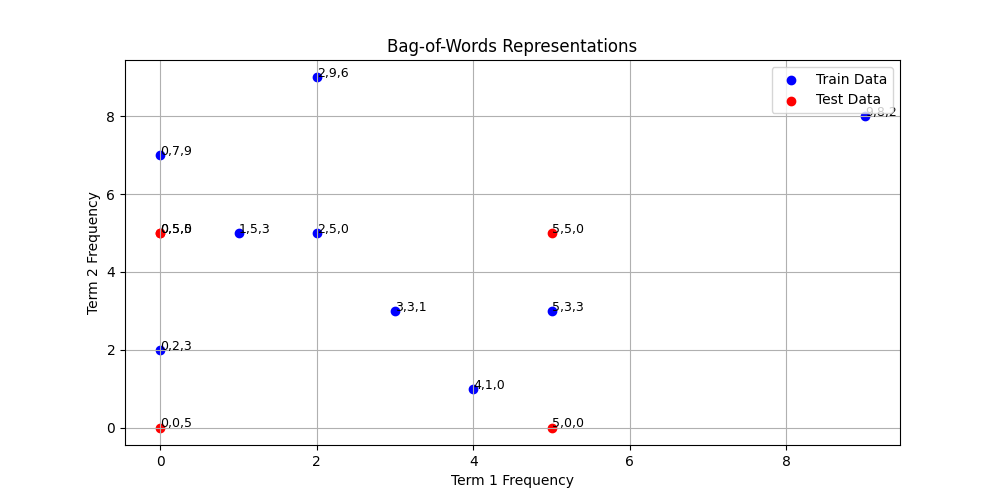

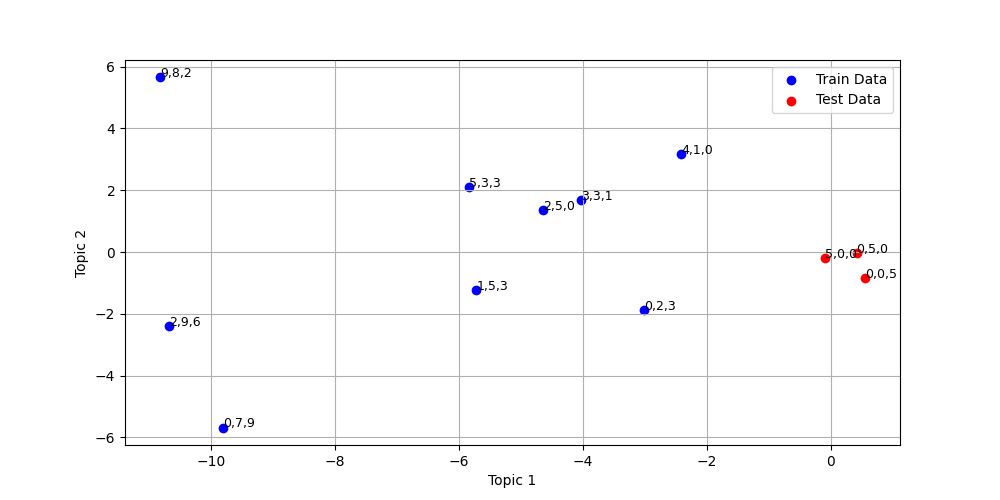

In [12]:
def plot_bow_representations(train_data, test_data):
    plt.figure(figsize=(10, 5))
    for i, point in enumerate(train_data):
        plt.scatter(point[0], point[1], color='blue', label='Train Data' if i == 0 else "")
        plt.text(point[0], point[1], f'{point[0]},{point[1]},{point[2]}', fontsize=9)
    for i, point in enumerate(test_data):
        plt.scatter(point[0], point[1], color='red', label='Test Data' if i == 0 else "")
        plt.text(point[0], point[1], f'{point[0]},{point[1]},{point[2]}', fontsize=9)
    plt.title('Bag-of-Words Representations')
    plt.xlabel('Term 1 Frequency')
    plt.ylabel('Term 2 Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotten der Topic-Koeffizienten
def plot_topic_coefficients(train_data, test_data, D_train, D_test):
    plt.figure(figsize=(10, 5))
    for i, point in enumerate(D_train.T):
        plt.scatter(point[0], point[1], color='blue', label='Train Data' if i == 0 else "")
        plt.text(point[0], point[1], f'{train_data[i][0]},{train_data[i][1]},{train_data[i][2]}', fontsize=9)
    for i, point in enumerate(D_test.T):
        plt.scatter(point[0], point[1], color='red', label='Test Data' if i == 0 else "")
        plt.text(point[0], point[1], f'{test_data[i][0]},{test_data[i][1]},{test_data[i][2]}', fontsize=9)
    plt.xlabel('Topic 1')
    plt.ylabel('Topic 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Aufruf der Plot-Funktionen
plot_bow_representations(bow_train, bow_test)
plot_topic_coefficients(bow_train, bow_test, np.dot(T.T, bow_train.T), D_test)

Fuehren Sie nun eine Dimensionsreduktion der Trainings und Testdaten auf zwei Dimensionen durch und plotten Sie die Topic-Koeffizienten (inkl. Bag-of-Words Annotationen). Vergleichen Sie alle drei Plots miteinander. Welchen Effekt hat die Topic Modellierung im Bezug auf typische Termkonfigurationen?

Optional: Transformieren Sie die Daten in einen Topic-Raum mit Dimension Eins und plotten Sie die Koeffizienten inkl. deren Bag-of-Words Annotationen.

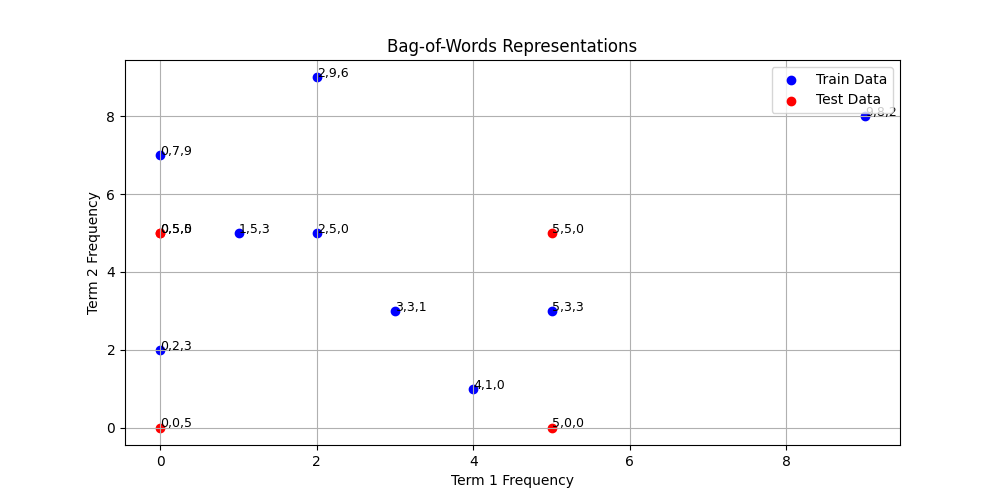

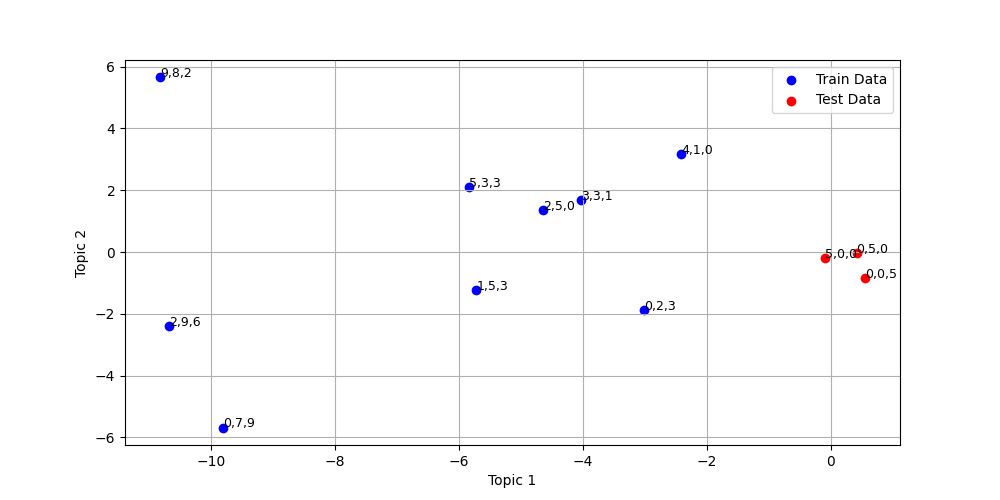

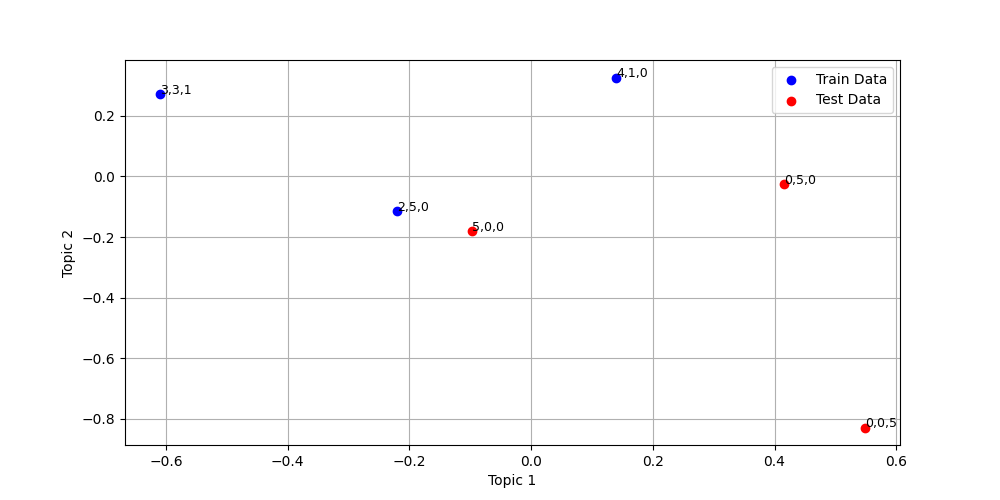

In [14]:
D_train_reduced = D_[:, :2]
D_test_reduced = D_test[:2, :]
plot_bow_representations(bow_train, bow_test)
plt.title('Topic Coefficients (Full Dimension)')
plot_topic_coefficients(bow_train, bow_test, np.dot(T.T, bow_train.T), D_test)
plt.title('Topic Coefficients (Reduced Dimension)')
plot_topic_coefficients(bow_train, bow_test, D_train_reduced.T, D_test_reduced)

Integrieren Sie nun die Topic-Raum Modellierung mittels Singulaerwertzerlegung in die Kreuzvalidierung auf dem Brown Corpus. Berechnen Sie dabei fuer jede Aufteilung von Training und Test einen neuen Topic-Raum. Transformieren Sie die Bag-of-Words Repraesentationen und fuehren Sie die Klassifikation wie zuvor mit dem Naechster-Nachbar-Klassifikator durch. Verwenden Sie dabei verschiedene Distanzmasse und evaluieren Sie die Klassifikationsfehlerrate fuer verschiedene Dimensionalitaeten des Topic-Raums. Die anderen Parameter waehlen Sie gemaess der besten bisherigen Ergebnisse.

Implementieren Sie die Klasse TopicFeatureTransform im features Modul und verwenden Sie sie mit der CrossValidation Klasse (evaluation Modul).

Optional: Fuehren Sie eine automatische Gridsuche ueber den kompletten Paramterraum durch. Legen Sie sinnvolle Wertebereiche und Schrittweiten fuer die einzelnen Parameter fest. Wie lassen sich diese bestimmen?

Optional: Passen Sie das Suchgrid dynamisch gemaess der Ergebnisse in den einzelnen Wertebereichen an

In [ ]:
from common.corpus import CorpusLoader
CorpusLoader.load()
brown = CorpusLoader.brown_corpus()

# hier code implentieren
raise NotImplementedError()